In [4]:
import networkx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import operator

In [2]:
graph = pickle.load(open('bbva.pickle', 'rb'))
graphb = pickle.load(open('../BA/graph_ba.pickle', 'rb'))
graph_er = pickle.load(open('../ER/graph_er.pickle', 'rb'))

In [5]:
dict(sorted(graphb.degree, key=operator.itemgetter(1), reverse=True)[:3])

{0: 196, 7: 182, 2: 142}

In [6]:
dict(sorted(graph_er.degree, key=operator.itemgetter(1), reverse=True)[:3])

{871: 25, 899: 24, 497: 24}

In [23]:
dict(sorted(graph.degree, key=operator.itemgetter(1), reverse=True)[:3])

{1: 82, 2: 81, 0: 76}

In [12]:
for node in graphb.nodes:
    if graphb.degree[node]==26:
        print(node)

25
28
67
70
20
51
93
40
74
165


In [ ]:
ba_bc = networkx.betweenness_centrality(graphb)
er_bc = networkx.betweenness_centrality(graph_er)
bbva_er = networkx.betweenness_centrality(graph)

In [21]:
max(ba_bc, key=ba_bc.get),ba_bc[max(ba_bc, key=ba_bc.get)]

(0, 0.16363034465803106)

In [22]:
max(er_bc, key=er_bc.get),er_bc[max(er_bc, key=er_bc.get)]

(871, 0.011709814645292823)

In [ ]:
max(bbva_er, key=bbva_er.get),bbva_er[max(bbva_er, key=bbva_er.get)]

In [125]:
aux_a = []
aux_b = []

for i in range(len(prob)):
    if prob[i] !=0:
        aux_a.append(prob[i])
        aux_b.append(mean_value_interval[i])
        

    

In [128]:
soll = np.polyfit(np.log(aux_b),np.log(aux_a),1)
soll

array([-2.48926851,  1.60216435])

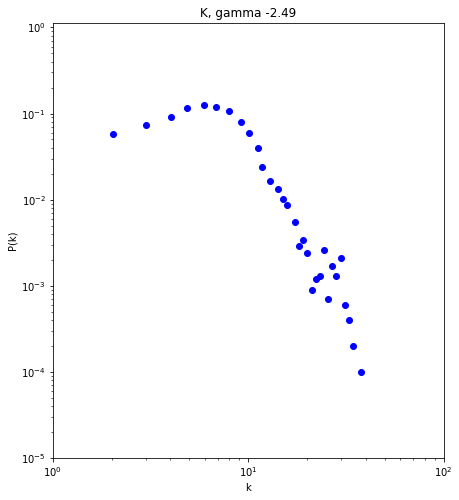

In [135]:
degr = [val for (node, val) in graph.degree()]
prob = []
mean_value_interval = []
for k in range(0,75):
    p = 0
    for d in degr:
        if 1.05**k < d and d < 1.05**(k+1):
            p+=1
    p = 1/n * p
    prob.append(p)
    aux = (1.05**k-1.05**(k+1))/(np.log(1.05**k)-np.log(1.05**(k+1)))
    mean_value_interval.append(aux)
    
plt.figure(figsize=(7,8))
plt.xscale('log')
plt.yscale('log')
plt.scatter(mean_value_interval,prob,marker='o',c = 'b')
#plt.plot(powerlaw(np.arange(1,max(degrees)),*sol1[0]))
plt.ylim(10**(-5))
plt.xlim(1,10**(2))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('K, gamma %s'%round(soll[0],2))
plt.savefig('metabbva-dd.png')
plt.show()
    

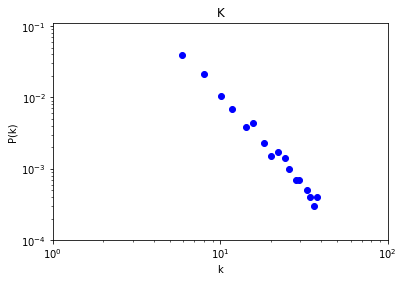

In [120]:
degr = [val for (node, val) in graphb.degree()]
prob = []
mean_value_interval = []
for k in range(0,75):
    p = 0
    for d in degr:
        if 1.05**k < d and d < 1.05**(k+1):
            p+=1
    p = 1/n * p
    prob.append(p)
    aux = (1.05**k-1.05**(k+1))/(np.log(1.05**k)-np.log(1.05**(k+1)))
    mean_value_interval.append(aux)
    
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(mean_value_interval,prob,marker='o',c = 'b')
#plt.plot(powerlaw(np.arange(1,max(degrees)),*sol1[0]))
plt.ylim(10**(-4))
plt.xlim(1,10**(2))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('K')
plt.show()

In [121]:
aux_a = []
aux_b = []

for i in range(len(prob)):
    if prob[i] !=0:
        aux_a.append(prob[i])
        aux_b.append(mean_value_interval[i])

In [123]:
np.polyfit(np.log(aux_b),np.log(aux_a),1)

array([-2.59255853,  1.46567716])

# Hubs selection

In [ ]:
#Hubs are really bad placed in our network need to create a new one

In [3]:
#hubs_rank = [17,14,13,11,2,6,1,12,5,9,10,8,3,15,7,4,16]

In [28]:
hubs_rank = [6,4,12,15,8,5,14,11,9,10,3,7,2,1,13,16,0]

In [8]:
import operator
max(graphb.degree,key=operator.itemgetter(1))

(0, 196)

In [36]:
higher5 = dict(sorted(graphb.degree, key=operator.itemgetter(1), reverse=True)[:5])

In [37]:
higher5

{0: 196, 7: 182, 2: 142, 3: 134, 4: 130}

In [38]:
j = 0
for node in higher5:
    graphb.nodes[node]['sector']=j
    j+=1

In [39]:
pickle.dump(graphb, open('Barabasi-with-sectors.pickle', 'wb'))

# Creation new one

In [31]:
new_ba = networkx.barabasi_albert_graph(10000,2)

In [32]:
higher17 = dict(sorted(new_ba.degree, key=operator.itemgetter(1), reverse=True)[:17])

In [34]:
higher17

{1: 224,
 5: 192,
 2: 190,
 6: 155,
 7: 153,
 3: 124,
 11: 111,
 25: 100,
 42: 84,
 10: 83,
 29: 80,
 59: 69,
 43: 66,
 82: 65,
 147: 64,
 19: 60,
 69: 60}

In [33]:
j = 0
for node in higher17:
    new_ba.nodes[node]['sector'] = hubs_rank[j]
    j+=1

In [ ]:
for node in new_ba.nodes not in higher17:
    